In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

# Load the data
data = pd.read_csv('../notebooks/data/merged_data.csv')

print(f'dataframe shape: {data.shape}')

dataframe shape: (1305, 344)


The recommended primary efficacy endpoint is the proportion of responders


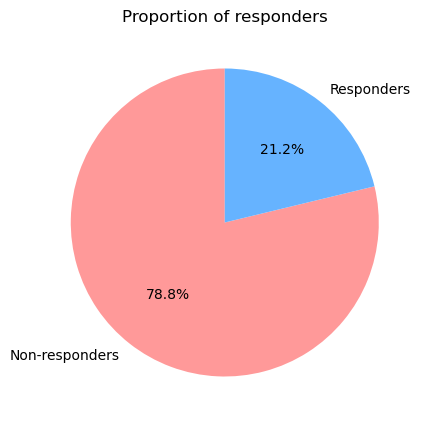

In [2]:
# plot proportion of responders
ax = data.responder.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Non-responders', 'Responders'], colors=['#ff9999','#66b3ff'], figsize=(5, 5))
ax.set_title('Proportion of responders')
ax.set_ylabel('')
plt.show()


The effects of the study drug on other (nonopioid) problematic drug use should also be evaluated as a secondary endpoint.


In [17]:

# create function to plot number of positive tests weekly for each drug class
def plot_drug_tests(df, type, drugclass, ax=None):

    # assert that type is either 'test' or 'survey'
    assert type in ['test', 'survey'], 'type must be either "test" or "survey"'

    # assert that drugclass must be include Propoxyphene, Amphetamines,Cannabinoids, Benzodiazepines, Cocaine (not case sensitive)
    assert drugclass in ['Propoxyphene', 'Amphetamines', 'Methamphetamine', 'Cannabinoids', 'Benzodiazepines', 'Cocaine'], 'drugclass must be one of "Propoxyphene", "Amphetamines", "Methamphetamine", "Cannabinoids", "Benzodiazepines", "Cocaine"'

    # filter df to total_visits == 26, this filters patients that completed treatment
    df = df[df['total_visits'] == 26]

    # create dataframe with columns for type and drug class
    df = df[[col for col in df.columns if col.startswith(type+'_') and drugclass in col]]

    # remove text and leave numbers in column names
    df.columns = [col.split('_')[-1] for col in df.columns]

    # fill nan values with 0
    df = df.fillna(0)

    # replace -5.0 with 0.0 
    df = df.replace(-5.0, 0.0)

    # plot the sum of the columns

    # set condition if axis object is not passed
    if ax is None:
        ax = plt.gca()
    sns.barplot(x=df.columns, y=df.sum(), ax=ax, palette='Blues_d')
    
    # create title
    ax.set_title(f' {drugclass} tests', fontsize=15)
    
    # remove the x axis 
    ax.set_xticklabels('')

    return ax

In [4]:
responder1 = data.loc[data.responder==1]

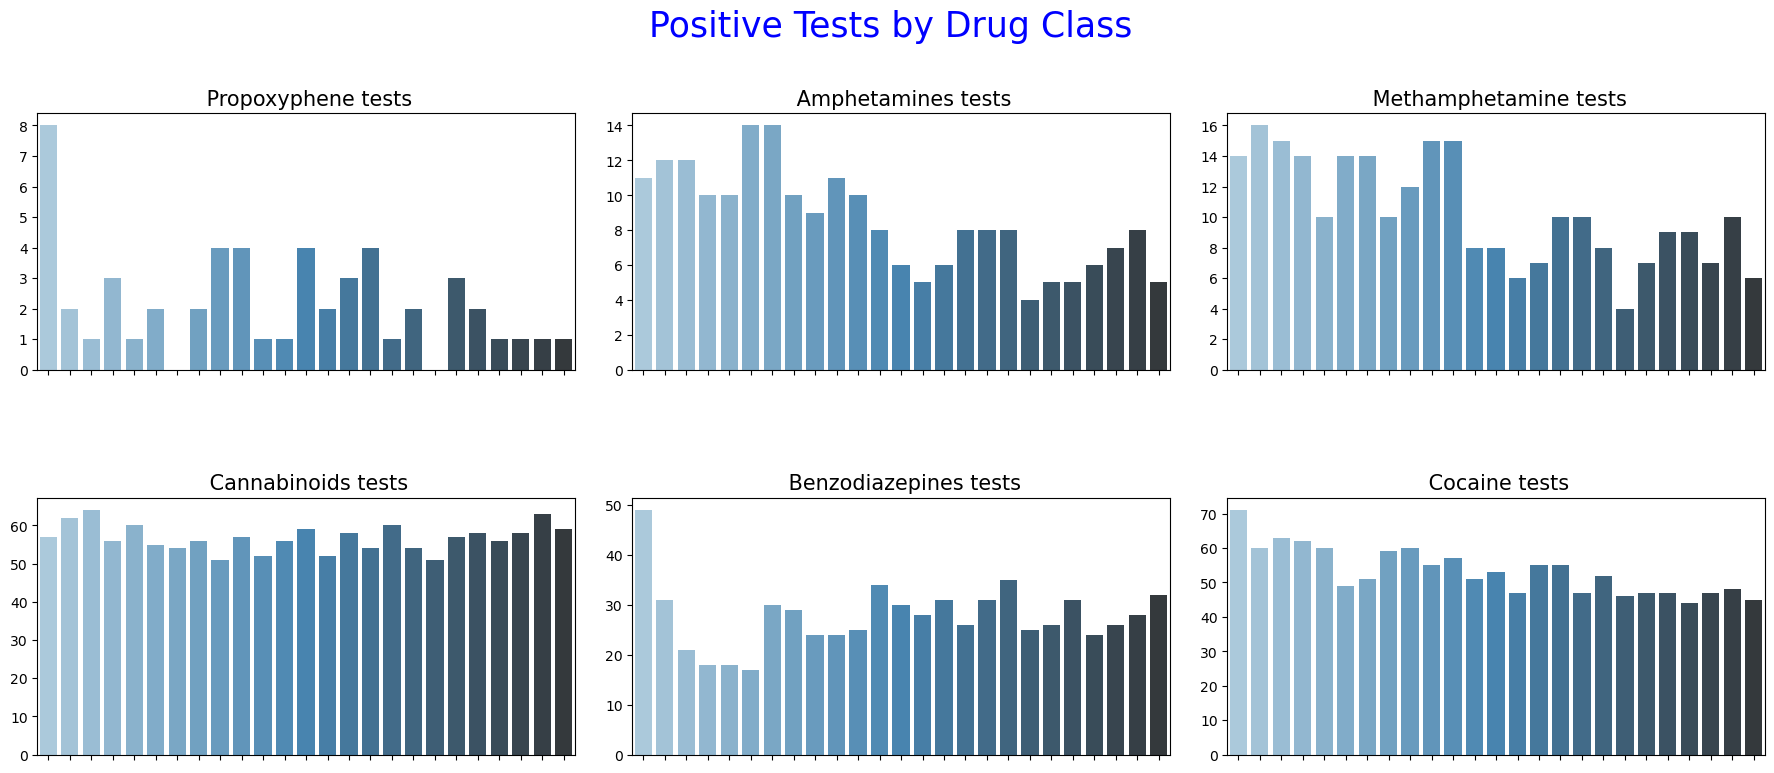

In [34]:
# plot positive drug tests from other drug classes to test positive rate

# create 2 x 3 subplots for each drug class
fig, axes = plt.subplots(2, 3, figsize=(18 ,8))
fig.suptitle('Positive Tests by Drug Class', fontsize=25, color='blue')

# space further from edge
fig.tight_layout()

# adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)

# adjust spacing from top title
plt.subplots_adjust(top=0.85)

# get all 6 plots in the same figure
for i, drugclass in enumerate(['Propoxyphene', 'Amphetamines', 'Methamphetamine', 'Cannabinoids', 'Benzodiazepines', 'Cocaine']):
    plot_drug_tests(responder1, 'test', drugclass, ax=axes[i//3, i%3])


The responder definition should be prespecified, taking into account the schedule of assessments, and may incorporate a grace period.



Efficacy analyses should include comparison of responder rates, cumulative responder curves, 4 and graphic displays of individual patient responses.


Text(0, 0.5, 'Cumulative patients')

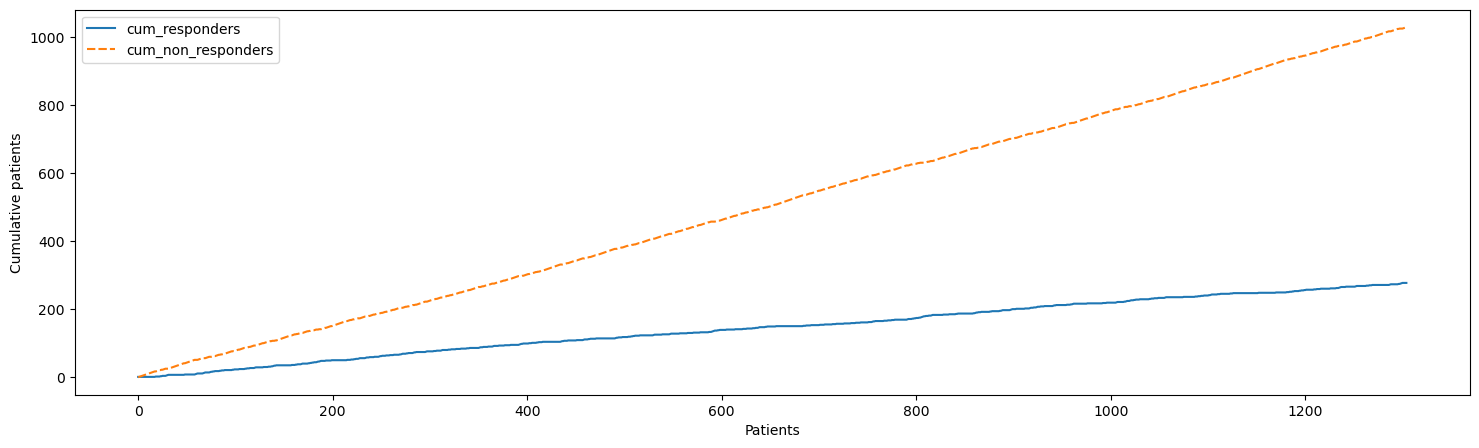

In [6]:
# create cumulative responder curve
# create a new column for cumulative responders
data['cum_responders'] = data.responder.cumsum()

# create a new column for cumulative non-responders
data['cum_non_responders'] = (data.responder == 0).cumsum()

# create a new column for cumulative total patients
plt.figure(figsize=(18, 5))
sns.lineplot(data=data[['cum_responders', 'cum_non_responders']])
plt.xlabel('Patients')
plt.ylabel('Cumulative patients')



Patients should be seen at frequent intervals and assessed for adverse events and clinical status (including drug-taking behavior measured by urine toxicology screen and self-report of opioid or other problematic drug use, and measures of clinical benefit or function).



These trials can employ different designs, including superiority or noninferiority (with a prespecified noninferioritymargin).



For purposes of this guidance, new entrants to treatment are individuals with OUD who regularly use opioids in an unsanctioned manner and whose drug use is having substantial impact on their function.



A cumulative responder curve or cumulative distribution function refers to an approach in which various possible definitions of responder are considered and compared graphically. The graph shows, for example, the percentage of patients who provided a given percentage of negative samples or better. The curves, therefore, fall from 100% at the left to 0% at the right.



In general, clinical trials evaluating effectiveness of drugs for treating OUD have used reduction in drug-taking behavior (drug use patterns) as an endpoint. 



Change in Disease Status Using Diagnostic Criteria for OUD

Remission
In early remission: After full criteria for opioid use disorder were previously met, none of the criteria for opioid use disorder have been met for at least 3 months but for less than 12 months (with the exception that Criterion 4, “Craving, or a strong desire or urge to use opioids,” may be met).




Change in drug use pattern
FDA generally accepts change in drug use patterns as a surrogate for the benefits of abstaining
from drug taking or for the presumed benefits of reducing drug taking. Change in drug use
pattern is the most commonly used endpoint in registration trials for drugs in development to
treat OUD. Sponsors have used it successfully to provide support of efficacy for all approved
products for treating OUD. Sponsors have used a variety of approaches to evaluate drug use
patterns. FDA recommends that sponsors compare percentage of responders rather than group
means. One method is to define a responder as a patient who reduces the use of opioids to or
below a threshold known to be associated with clinical benefit. A successful trial would show
either a higher percentage of responders in the treatment arm (for superiority trials) or
noninferiority in the percentage of responders (for active-controlled noninferiority trials).





A commonly used definition for a responder is abstinence, defined as no detected or self-
reported use during the specific assessment window. It is not possible to have absolute
confidence that a responder achieved complete abstinence. Very frequent measurements provide
more assurance of a substantial reduction in drug use, whereas infrequent drug use measurements
result in greater uncertainty about the true magnitude of reduction in drug use. For this reason,
absence of positive urine drug tests, absence of self-reported drug use, and attendance at frequent
scheduled observations for these measures are components of a complete abstinence response
definition.


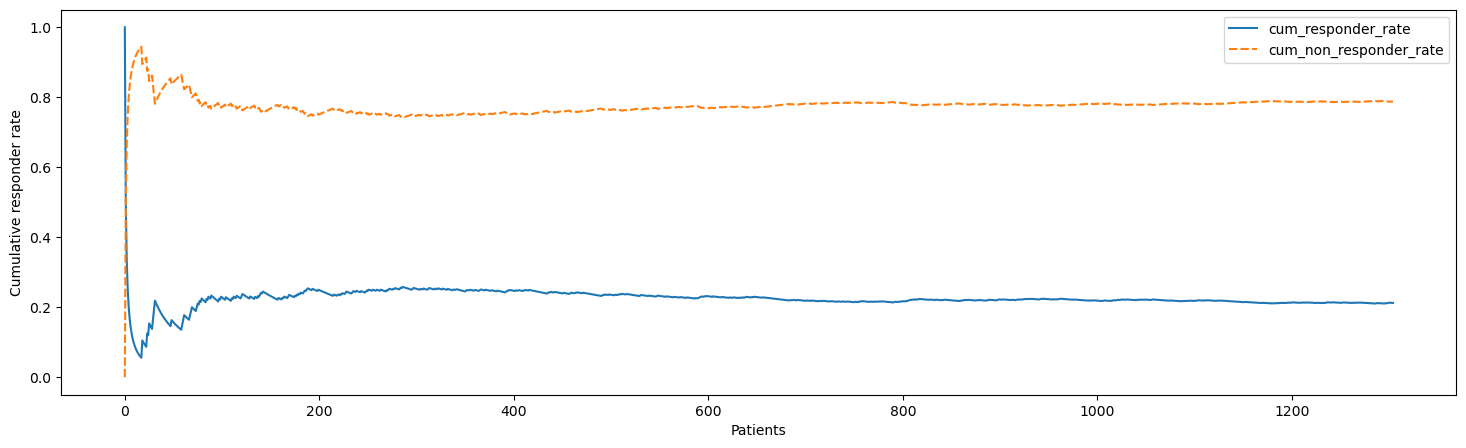

In [7]:
# cumulative distribution function
# create a new column for cumulative responders
data['cum_responders'] = data.responder.cumsum()

# create a new column for cumulative non-responders
data['cum_non_responders'] = (data.responder == 0).cumsum()

# create a new column for cumulative total patients
data['cum_total_patients'] = data.index + 1

# create a new column for cumulative responders
data['cum_responder_rate'] = data.cum_responders / data.cum_total_patients

# create a new column for cumulative non-responders
data['cum_non_responder_rate'] = data.cum_non_responders / data.cum_total_patients

# create a new column for cumulative total patients
plt.figure(figsize=(18, 5))
sns.lineplot(data=data[['cum_responder_rate', 'cum_non_responder_rate']])
plt.xlabel('Patients')
plt.ylabel('Cumulative responder rate')
plt.show()
